In [3]:
import os
os.chdir('E:\projects\Image_Classification')

In [4]:
import tensorflow as tf
from os import path, getcwd

In [5]:
ls

model.h5  Test/  Test1/  Train/


In [6]:
# Directory with our training cars pictures
train_car_dir = os.path.join('Train/Car')

# Directory with our training trucks pictures
train_truck_dir = os.path.join('Train/Truck')

# Directory with our training cars pictures
validation_car_dir = os.path.join('Test/Car')

# Directory with our training trucks pictures
validation_truck_dir = os.path.join('Test/Car')

In [7]:
train_car_names = os.listdir(train_car_dir)
print(train_car_names[:10])

train_truck_names = os.listdir(train_truck_dir)
print(train_truck_names[:10])

validation_car_names = os.listdir(validation_car_dir)
print(validation_car_names[:10])

validation_truck_names = os.listdir(validation_truck_dir)
print(validation_truck_names[:10])

['images (57).jpg', 'images (4).jpg', 'images (3).jpg', 'images (56).jpg', 'images (5).jpg', 'images (55).jpg', 'images (53).jpg', 'images (23).jpg', 'images (21).jpg', 'images (22).jpg']
['562042856.jpg', '510683903.jpg', '488035092.jpg', '485953581.jpg', '461445593.jpg', '460936951.jpg', '440092388.jpg', '414867369.jpg', 'Truck1.jpg', '967547956.jpg']
['images (76).jpg', 'images (6).jpg', 'images (5).jpg', 'images (4).jpg', 'images (3).jpg', 'images (1).jpg', 'images (2)1.jpg', 'download (2).jpg', 'download (1)1.jpg', 'download (1).jpg']
['images (76).jpg', 'images (6).jpg', 'images (5).jpg', 'images (4).jpg', 'images (3).jpg', 'images (1).jpg', 'images (2)1.jpg', 'download (2).jpg', 'download (1)1.jpg', 'download (1).jpg']


In [8]:
print('total training car images:', len(os.listdir(train_car_dir)))
print('total training truck images:', len(os.listdir(train_truck_dir)))
print('total validation car images:', len(os.listdir(validation_car_dir)))
print('total validation truck images:', len(os.listdir(validation_truck_dir)))

total training car images: 55
total training truck images: 55
total validation car images: 20
total validation truck images: 20


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

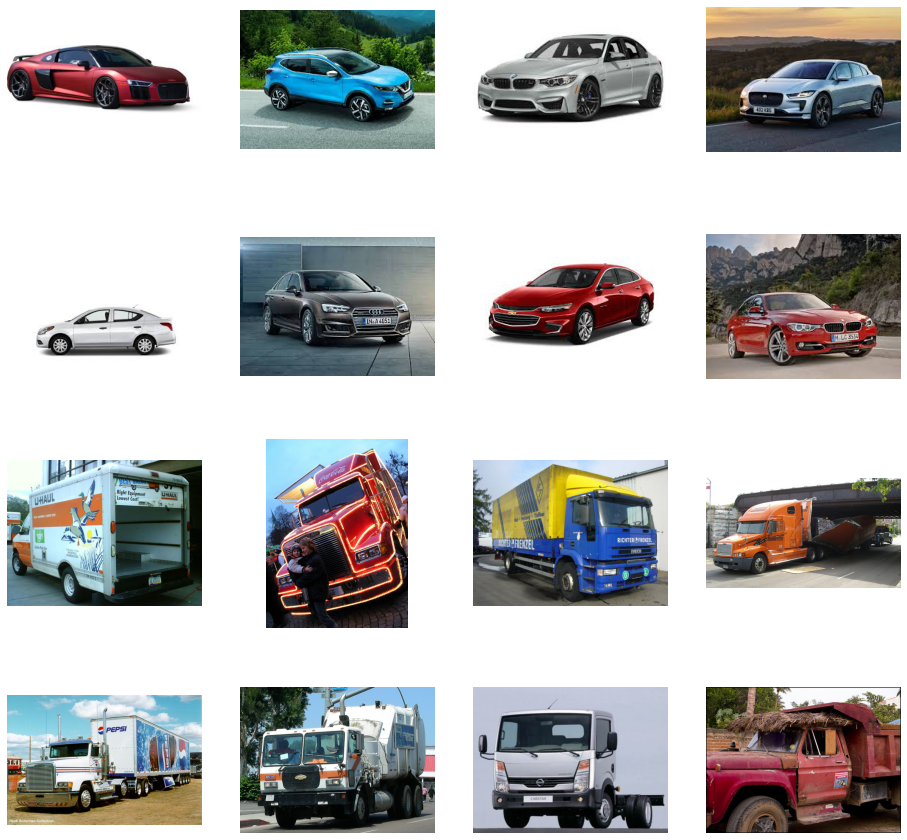

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_car_pix = [os.path.join(train_car_dir, fname) 
                for fname in train_car_names[pic_index-8:pic_index]]
next_truck_pix = [os.path.join(train_truck_dir, fname) 
                for fname in train_truck_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_car_pix+next_truck_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # It will contain a value from 0-1 where 0 for 1 class ('cars') and 1 for the other ('trucks')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'Test/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 110 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/15
10/10 [==============================] - 4s 130ms/step - loss: 0.7032 - accuracy: 0.4999 - val_loss: 0.6915 - val_accuracy: 0.4500
Epoch 2/15
10/10 [==============================] - 1s 75ms/step - loss: 0.6867 - accuracy: 0.5441 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 1s 71ms/step - loss: 0.6673 - accuracy: 0.6598 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 4/15
10/10 [==============================] - 1s 74ms/step - loss: 0.6599 - accuracy: 0.6164 - val_loss: 0.6749 - val_accuracy: 0.6500
Epoch 5/15
10/10 [==============================] - 1s 71ms/step - loss: 0.5953 - accuracy: 0.7816 - val_loss: 0.5915 - val_accuracy: 0.7000
Epoch 6/15
10/10 [==============================] - 1s 73ms/step - loss: 0.5758 - accuracy: 0.7676 - val_loss: 0.6344 - val_accuracy: 0.5500
Epoch 7/15
10/10 [==============================] - 1s 76ms/step - loss: 0.5191 - accuracy: 0.8162 - val_loss: 0.5515 - val_accuracy: 0.7000
Epoch 8/15
1

In [16]:
from tensorflow.keras.models import load_model, save_model

In [17]:
save_model(model, "model.h5")

In [18]:
model = load_model("model.h5")

In [19]:
Testnames = os.listdir('Test1')
print(Testnames[:])

['images (2).jpg', 'images.jpg', 'images (1).jpg', 'images (3).jpg', 'images (4).jpg', 'download.jpg', 'images (5).jpg', 'images (6).jpg', 'images (7).jpg', 'images (8).jpg']


In [20]:
import numpy as np
from keras.preprocessing import image

[1.]
This image is a Car


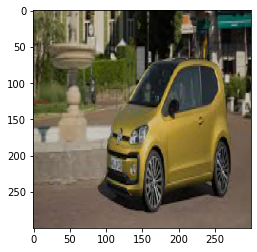

In [21]:
path = 'Test1/'+Testnames[0]
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    plt.imshow(img)
    print("This image is a Car")
else:
    plt.imshow(img)
    print("This image is a Truck")

[1.]
This image is a Car


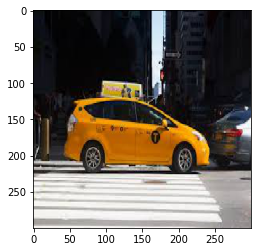

In [22]:
path = 'Test1/'+Testnames[1]
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    plt.imshow(img)
    print("This image is a Car")
else:
    plt.imshow(img)
    print("This image is a Truck")

[0.]
This image is a Truck


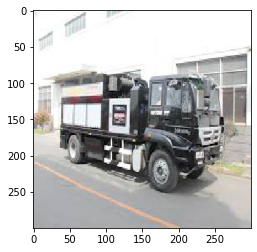

In [23]:
path = 'Test1/'+Testnames[9]
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    plt.imshow(img)
    print("This image is a Car")
else:
    plt.imshow(img)
    print("This image is a Truck")